# Iris 붓꽃 종 분류
[kaggle](https://www.kaggle.com/parkdaeun/ml-from-scratch-with-iris)

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [12]:
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle/Iris/data/iris.csv')
iris.drop('Id',axis=1,inplace=True)
print(iris.info())
display(iris)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## 탐색적 데이터 분석(EDA)

### 꽃받침(Sepal)의 길이와 너비사이의 관계

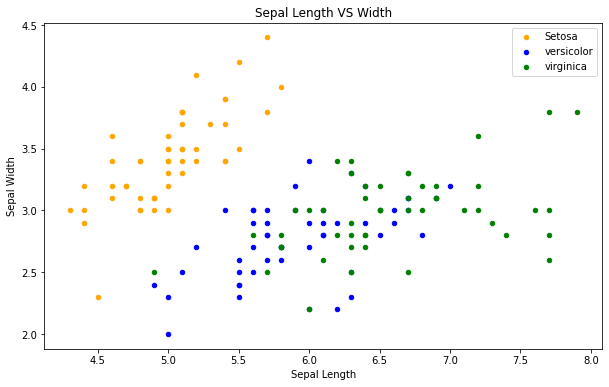

In [96]:
fig = iris[iris['Species']=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris['Species']=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='versicolor', ax=fig)
iris[iris['Species']=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

### 꽃잎(Petal)의 길이와 너비사이의 관계

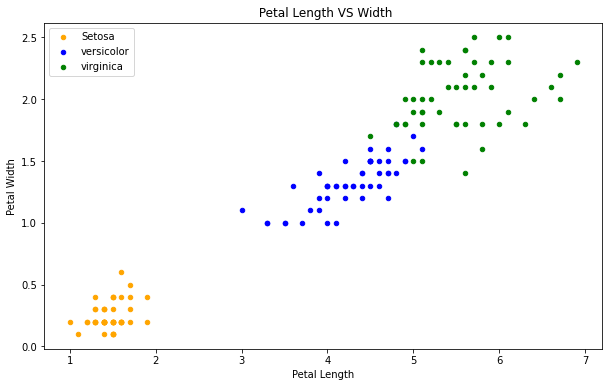

In [97]:
fig = iris[iris['Species']=='Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris['Species']=='Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue', label='versicolor', ax=fig)
iris[iris['Species']=='Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

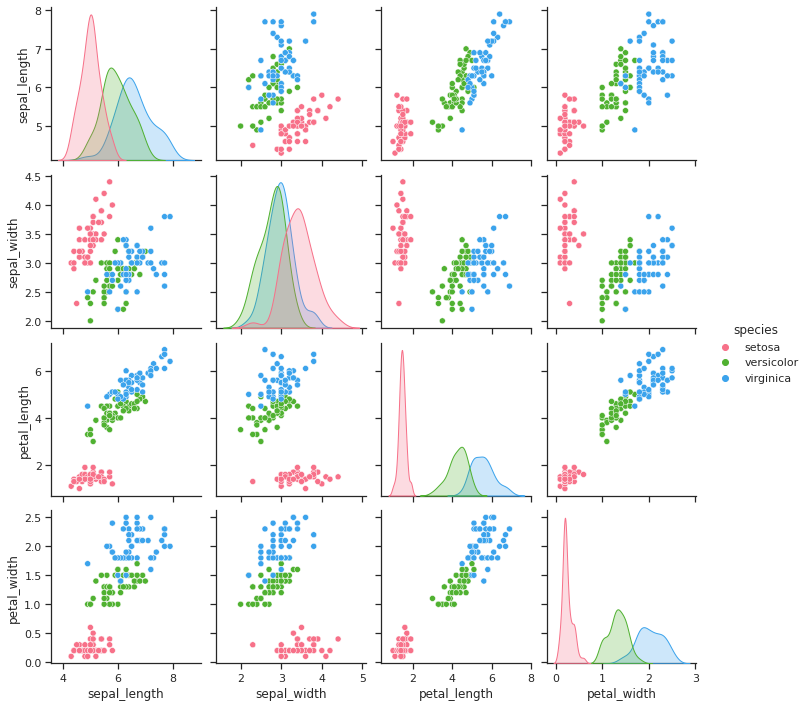

In [14]:
sns_iris = sns.load_dataset("iris")
sns.set(style="ticks", color_codes=True)
sns.pairplot(sns_iris, hue="species", palette="husl")

### 길이와 너비의 분포

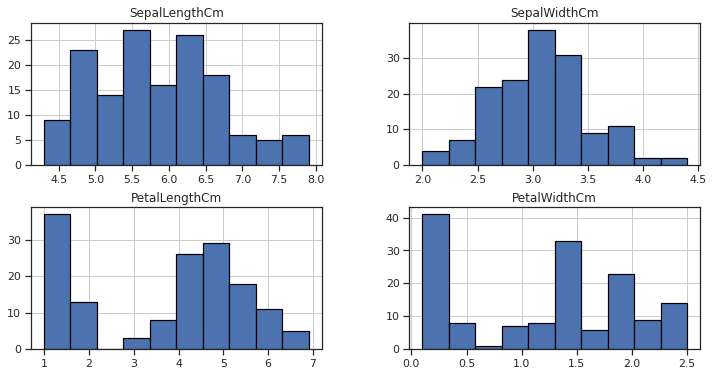

In [15]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

### 종에 따라 길이와 폭이 어떻게 다른지

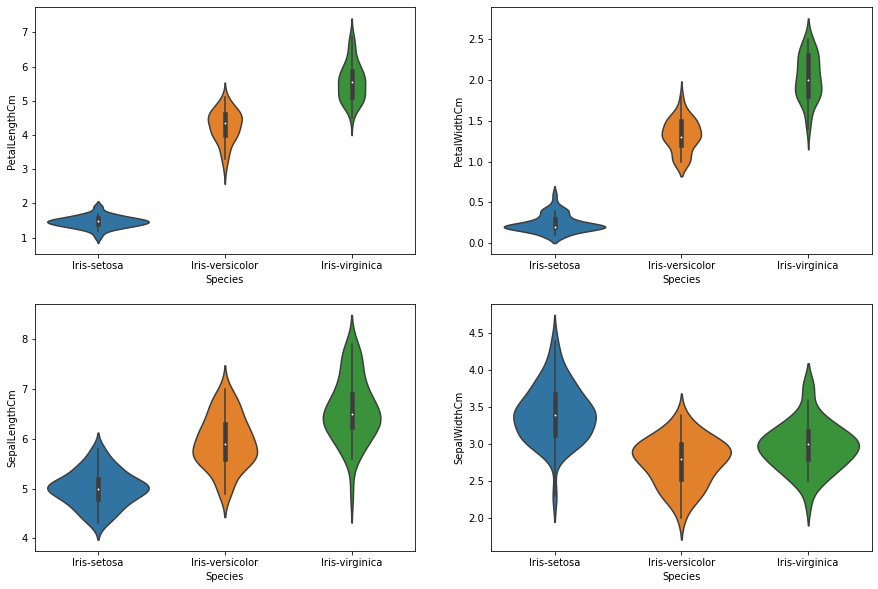

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

## 모델링(Modeling)

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbour (KNN)
from sklearn import svm # Support Vector Machine (SVM)

from sklearn import metrics

### 상관행렬
- 꽃받침(Speal)의 너비(Witdh)와 길이(Length)는 상관관계가 없음
- 꽃잎(Petal)의 너비(Width)와 길이(Length)는 상관관계가 높음

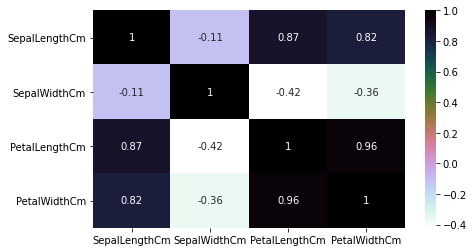

In [23]:
# 상관행렬
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show()

### Split Train set and Test set

In [42]:
train, test = train_test_split(iris, test_size = 0.3, random_state=777) # random shuffle (재현성 만족)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [43]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_Y = train['Species']
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_Y = test['Species']

### Support Vector Machine (SVM)

In [44]:
model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is:', metrics.accuracy_score(prediction, test_Y))

The accuracy of the SVM is: 0.9777777777777777


### Logistic Regression

In [98]:
model = LogisticRegression(solver='lbfgs', max_iter=200) # max_iter=100 (default)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is:', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Logistic Regression is: 1.0


### Decision Tree

In [53]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the Decision Tree is:', metrics.accuracy_score(prediction, test_Y))

The accuracy of the Decision Tree is: 0.9777777777777777


### K-Nearest Neighbour (KNN)

In [62]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy of the KNN is:', metrics.accuracy_score(prediction, test_Y))

The accuracy of the KNN is: 0.9777777777777777


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7faf87876a50>,
 <a list of 10 Text major ticklabel objects>)

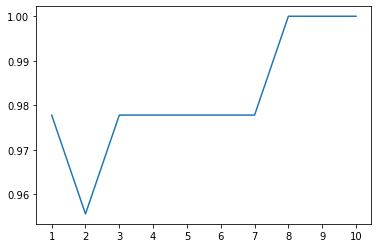

In [83]:
n_list = [n for n in range(1,11)]
score = pd.Series()

for n in n_list:
    model = KNeighborsClassifier(n_neighbors=n) 
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    score = score.append(pd.Series(metrics.accuracy_score(prediction, test_Y)), ignore_index=True)

plt.plot(n_list, score)
plt.xticks(n_list)

### 변수 선택에 따른 정확성 증가 검증
- Feature Selection

In [85]:
petal = iris[['PetalLengthCm', 'PetalWidthCm', 'Species']]
sepal = iris[['SepalLengthCm', 'SepalWidthCm', 'Species']]

In [88]:
# Petal(꽃잎)
Petal_train, Petal_test = train_test_split(petal, test_size=0.3, random_state=777)
Petal_train_X = Petal_train[['PetalWidthCm', 'PetalLengthCm']]
Petal_train_Y = Petal_train['Species']
Petal_test_X = Petal_test[['PetalWidthCm', 'PetalLengthCm']]
Petal_test_Y = Petal_test['Species']

# Sepal(꽃받침)
Sepal_train, Sepal_test = train_test_split(sepal, test_size=0.3, random_state=777)
Sepal_train_X = Sepal_train[['SepalWidthCm', 'SepalLengthCm']]
Sepal_train_Y = Sepal_train['Species']
Sepal_test_X = Sepal_test[['SepalWidthCm', 'SepalLengthCm']]
Sepal_test_Y = Sepal_test['Species']

In [89]:
# SVM
model = svm.SVC()
model.fit(Petal_train_X, Petal_train_Y) 
prediction = model.predict(Petal_test_X) 
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, Petal_test_Y))

model = svm.SVC()
model.fit(Sepal_train_X, Sepal_train_Y) 
prediction = model.predict(Sepal_test_X) 
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction, Sepal_test_Y))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.7777777777777778


In [90]:
# Logistic Regression
model = LogisticRegression(solver='lbfgs', max_iter=200) # max_iter=100 (default)
model.fit(Petal_train_X, Petal_train_Y) 
prediction = model.predict(Petal_test_X) 
print('The accuracy of the Logistic Regression using Petal is:', metrics.accuracy_score(prediction, Petal_test_Y))

model = LogisticRegression(solver='lbfgs', max_iter=200) # max_iter=100 (default)
model.fit(Sepal_train_X, Sepal_train_Y)
prediction = model.predict(Sepal_test_X)
print('The accuracy of the Logistic Regression using Sepal is:', metrics.accuracy_score(prediction, Sepal_test_Y))

The accuracy of the Logistic Regression using Petal is: 1.0
The accuracy of the Logistic Regression using Sepal is: 0.8


In [91]:
# Decision Tree
model = DecisionTreeClassifier()
model.fit(Petal_train_X, Petal_train_Y) 
prediction = model.predict(Petal_test_X) 
print('The accuracy of the Decision Tree using Petal is:', metrics.accuracy_score(prediction, Petal_test_Y))

model = DecisionTreeClassifier()
model.fit(Sepal_train_X, Sepal_train_Y)
prediction = model.predict(Sepal_test_X)
print('The accuracy of the Decision Tree using Sepal is:', metrics.accuracy_score(prediction, Sepal_test_Y))

The accuracy of the Decision Tree using Petal is: 1.0
The accuracy of the Decision Tree using Sepal is: 0.7111111111111111


In [95]:
# KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(Petal_train_X, Petal_train_Y) 
prediction = model.predict(Petal_test_X) 
print('The accuracy of the KNN using Petal is:', metrics.accuracy_score(prediction, Petal_test_Y))

model = KNeighborsClassifier(n_neighbors=3)
model.fit(Sepal_train_X, Sepal_train_Y)
prediction = model.predict(Sepal_test_X)
print('The accuracy of the KNN using Sepal is:', metrics.accuracy_score(prediction, Sepal_test_Y))

The accuracy of the KNN using Petal is: 0.9555555555555556
The accuracy of the KNN using Sepal is: 0.8
